In [ ]:
import pandas as pd
unkai_df = pd.read_csv("./雲海2014.csv", header=1)
unkai_df.head()

In [ ]:
target_df = unkai_df.loc[unkai_df["閾値40"] == "適中"]
target_df.head()

In [ ]:
target_dates = target_df["日付"].to_numpy()
target_dates

In [ ]:
def inquire_grib_data(path):
    import pygrib                  # gribファイルの中身を見たい場合はinquire_grib_data(path)を実行                
    grbs = pygrib.open(path)
    for grb in grbs:
        print(grb)
    return
def read_grib_data(path,name=None,level=None):
    import numpy as np
    import pygrib                   # pygribは!pip3 install pygrib --userでインストール
    grbs = pygrib.open(path)

    if name != None:                # anl_surf125に対しては変数名を与える
        alines = grbs.select(name=name)
    elif level != None:             # anl_p125に対しては気圧面を与えるとその水平面データ
        alines = grbs.select(level=level)
    else:                           #                  気圧面を与えないと全３次元データ
        alines = grbs.select()

    lat, lon = alines[0].latlons()  # lonは経度、latは緯度データ: (ny,nx)の２次元格子です
    ny, nx = lat.shape
    nline = len(alines)
    gdata = np.empty( (nline,ny,nx), dtype = "f4" )
    levels = np.empty( (nline), dtype = "f4" )
    for iline, aline in enumerate(alines):
        gdata[iline,:,:] = aline.values[::-1,:]
        levels[iline] = aline["level"]

    return lon, lat[::-1], level, gdata 

In [22]:
import datetime as dt
import calendar as cal
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

dts=[]
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2014,month)[1]
    dts.extend([dt.datetime(2014,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均

slpm /= 100    
slpm=np.zeros((len(dts),145,288))
slpm[target_idxes, :, :] /= 100

for i,dt in enumerate(dts):
    fdir = "/mnt/hwmet-hdd01/Database/JRA55/anl_p125/"
    fname = "/anl_surf125."
    path=dt.strftime(fdir+"%Y%m"+fname+"%Y%m%d%H")
    lon,lat,_,SLP0=read_grib_data(path,name="Mean sea level pressure")
    slpm[i,:,:]=SLP0

    
target_idxes = []
for idx, d in enumerate(dts):
    string_dt = f"{d.year}/{d.month}/{d.day}"
    if string_dt in target_dates:
#         print(idx, string_dt)
        target_idxes.append(idx)
    
print(target_idxes)

[544, 545, 546, 547, 548, 549, 550, 551, 568, 569, 570, 571, 572, 573, 574, 575, 588, 589, 590, 591, 600, 601, 602, 603, 612, 613, 614, 615, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 724, 725, 726, 727, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 776, 777, 778, 779, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 852, 853, 854, 855, 856, 857, 858, 859, 880, 881, 882, 883, 884, 885, 886, 887, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,

In [23]:
mean = np.mean(slpm[target_idxes, :, :], axis=0)
mean

array([[103074.94808923, 103074.94808923, 103074.94808923, ...,
        103074.94808923, 103074.94808923, 103074.94808923],
       [103047.00192959, 103047.00192959, 103064.90479104, ...,
        103015.62015248, 103028.21427899, 103047.00192959],
       [102897.0772308 , 102900.44695971, 102964.06706514, ...,
        102821.36186935, 102827.96955008, 102893.56631212],
       ...,
       [101097.9149567 , 101097.65140248, 101092.66269767, ...,
        101103.96729104, 101103.37429405, 101098.07497176],
       [101119.0087067 , 101119.0087067 , 101116.97557417, ...,
        101124.11036333, 101121.72896273, 101119.0087067 ],
       [101168.50042357, 101168.50042357, 101168.50042357, ...,
        101168.50042357, 101168.50042357, 101168.50042357]])

In [ ]:
def draw_graph(xmesh,ymesh,topo_data):
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    fig = plt.figure( figsize = (5,2.5), dpi = 300 )
    proj = ccrs.Mercator(central_longitude=140)
    proj_cart = ccrs.PlateCarree()
    ax = plt.axes((0.1,0.1,0.8,0.8), projection=proj)
    ax.set_extent([120,160,25,50],crs=proj_cart)
    ax.coastlines()
    
    C = ax.contourf(xmesh,ymesh,topo_data,cmap="RdYlBu",transform=proj_cart)
    fig.colorbar(C)
    fig.savefig("当たりの日.png")
    plt.show()
    return ax

draw_graph(lon,lat,mean)

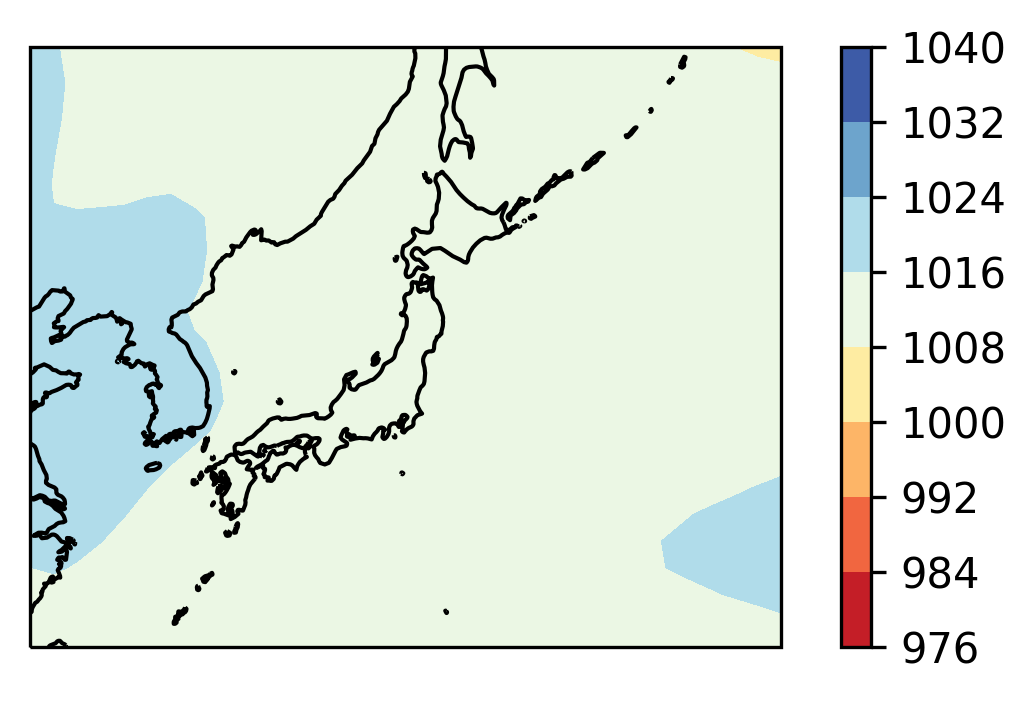

AttributeError: 'NoneType' object has no attribute 'contour'

In [26]:
slpm /= 100
#Mean=np.mean(slpm,axis=0)

### ベースの図
ax = draw_graph(lon,lat,Mean)
### 等高線
levels = np.arange(960.0, 1040.1, 4.0)
colors = ['darkblue']
mappable = ax.contour(lon,lat,Mean,levels=levels, colors=["black"], transform=ccrs.PlateCarree())
plt.clabel(mappable, fmt="%4.0f", inline=True)

mean=np.mean(slpm,axis=0)
plt.show()